<a href="https://colab.research.google.com/github/JAntonioRosales/CE888-Data-Science/blob/main/labs/lab_2/Lab2_bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [1]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
# pandas.DataFrame.values --> Return a Numpy representation of the DataFrame. At https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.values.html
# pandas.DataFrame.T --> Reflect the DataFrame over its main diagonal by writing rows as columns and vice-versa. At https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.T.html
# you can print out data or df to see what's going on
data

array([ 2.,  8., 20., 13.,  5.,  9., 10.,  8., 22., 10.,  2.,  4.,  7.,
        9.])

In [3]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(x, sample_size, n_bootstraps):
	boot_array = np.random.choice(x, size=(n_bootstraps, sample_size), replace=True) # array of random samples with replacement from data
	data_mean = np.mean(boot_array) # mean of all of the bootstraps
	boot_means = [] # list for the mean of each bootstrap
	for row in range(boot_array.shape[0]):
		boot_mean = np.mean(boot_array[row,:]) # mean for each bootstrap (row)
		boot_means.append(boot_mean)
	upper = np.percentile(boot_means, 97.5)
	lower = np.percentile(boot_means, 2.5)
	return data_mean, lower, upper

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

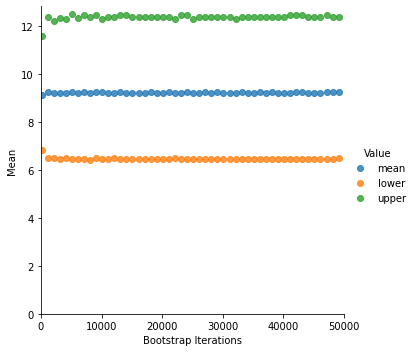

In [4]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000): # range(start, stop, step)
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
#df_boot

sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)


Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [5]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
	boot_array = np.random.choice(sample, size=(n_bootstraps, sample_size), replace=True) # array of random samples with replacement from data
	data_mean = np.mean(boot_array) # mean of all of the bootstraps
	boot_means = [] # list for the mean of each bootstrap
	for row in range(boot_array.shape[0]):
		boot_mean = np.mean(boot_array[row,:]) # mean for each bootstrap (row)
		boot_means.append(boot_mean)
	upper = np.percentile(boot_means, 100-((100-ci)/2))
	lower = np.percentile(boot_means, (100-ci)/2)
	return data_mean, lower, upper

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

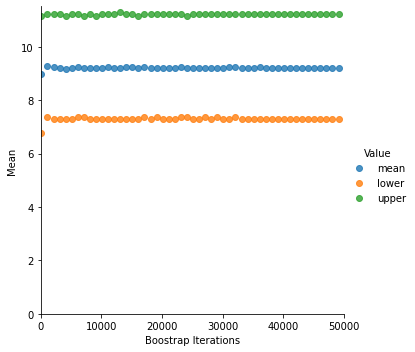

In [6]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')

# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


In [10]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
df

# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->
# Note: you can add more cells as needed to organise your code and your plots


,Current fleet,New Fleet
0,18,24.0
1,15,27.0
2,18,27.0
3,16,25.0
4,17,31.0
...,...,...
244,27,NaN
245,27,NaN
246,32,NaN
247,28,NaN


In [11]:
# array for the current fleet
data_cfleet = df.values.T[0]
data_cfleet

array([18., 15., 18., 16., 17., 15., 14., 14., 14., 15., 15., 14., 15.,
       14., 22., 18., 21., 21., 10., 10., 11.,  9., 28., 25., 19., 16.,
       17., 19., 18., 14., 14., 14., 14., 12., 13., 13., 18., 22., 19.,
       18., 23., 26., 25., 20., 21., 13., 14., 15., 14., 17., 11., 13.,
       12., 13., 15., 13., 13., 14., 22., 28., 13., 14., 13., 14., 15.,
       12., 13., 13., 14., 13., 12., 13., 18., 16., 18., 18., 23., 11.,
       12., 13., 12., 18., 21., 19., 21., 15., 16., 15., 11., 20., 21.,
       19., 15., 26., 25., 16., 16., 18., 16., 13., 14., 14., 14., 28.,
       19., 18., 15., 15., 16., 15., 16., 14., 17., 16., 15., 18., 21.,
       20., 13., 23., 20., 23., 18., 19., 25., 26., 18., 16., 16., 15.,
       22., 22., 24., 23., 29., 25., 20., 18., 19., 18., 27., 13., 17.,
       13., 13., 13., 30., 26., 18., 17., 16., 15., 18., 21., 19., 19.,
       16., 16., 16., 16., 25., 26., 31., 34., 36., 20., 19., 20., 19.,
       21., 20., 25., 21., 19., 21., 21., 19., 18., 19., 18., 18

In [12]:
# array for the new fleet
data_nfleet = df.values.T[1]
data_nfleet = data_nfleet[~np.isnan(data_nfleet)]
data_nfleet

array([24., 27., 27., 25., 31., 35., 24., 19., 28., 23., 27., 20., 22.,
       18., 20., 31., 32., 31., 32., 24., 26., 29., 24., 24., 33., 33.,
       32., 28., 19., 32., 34., 26., 30., 22., 22., 33., 39., 36., 28.,
       27., 21., 24., 30., 34., 32., 38., 37., 30., 31., 37., 32., 47.,
       41., 45., 34., 33., 24., 32., 39., 35., 32., 37., 38., 34., 34.,
       32., 33., 32., 25., 24., 37., 31., 36., 36., 34., 38., 32., 38.,
       32.])

## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

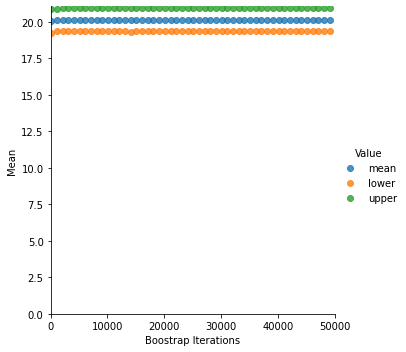

In [15]:
# current fleet ststistics
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data_cfleet, data_cfleet.shape[0], i, 95)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

With 95% confidence, the mean for the **current fleet** is estimated to be between **19 and 21**.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

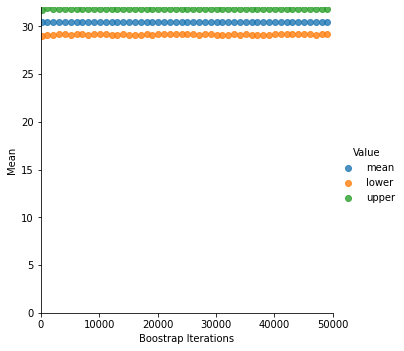

In [16]:
# new fleet ststistics
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data_nfleet, data_nfleet.shape[0], i, 95)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

With 95% confidence, the mean for the **new fleet** is estimated to be between **29 and 31**.

In [24]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """
    # calculating the observed test statistic
    og_mean_old = np.mean(sample1)
    og_mean_new = np.mean(sample2)
    tobs = og_mean_new - og_mean_old

    # initializing count variables for tperm > tobs
    c_yes = 0
    c_no = 0

    # merging data into a new array
    concat = np.concatenate((sample1, sample2))

    # perform N permutations
    for i in range(n_permutations):
      
      # random permutation
      perm = np.random.permutation(concat)

      # splitting the dataset
      n_old = sample1.shape
      n_old = n_old[0]
      pold = perm[:n_old]
      pnew  = perm[n_old:]

      # new test statistic
      mean_old = np.mean(pold)
      mean_new = np.mean(pnew)
      tperm = mean_new - mean_old
      
      # count number of times tperm > tobs
      if tperm > tobs: c_yes += 1
      else: c_no += 1

    total_perm = c_yes + c_no
    pvalue = c_yes / total_perm

    return pvalue

In [26]:
p = permut_test(data_cfleet, data_nfleet, 30000)
print(p)

0.0


Based on our fleet samples, we found **statistically significant differences** at a 5% significance level in the average scores of the current and new fleet, with the **new fleet achieving larger averages** (p = 0.0).

#QUIZ 2

In [36]:
# Question 2
# The 95% confidence interval for the mean of the customers dataset using 10000 iterations is

q2 = bootstrap_mean_ci(data, data.shape[0], 10000, 95)
print(q2)

(9.201242857142857, 6.5, 12.357142857142858)


In [37]:
# Question 3
# The 85% confidence interval for the mean of the old fleet in the vehicles dataset using 10000 iterations is

q3 = bootstrap_mean_ci(data_cfleet, data_cfleet.shape[0], 10000, 85)
print(q3)

(20.140139759036146, 19.55823293172691, 20.718875502008032)


In [38]:
def bootstrap_std_ci(sample, sample_size, n_bootstraps, ci):
	boot_array = np.random.choice(sample, size=(n_bootstraps, sample_size), replace=True) # array of random samples with replacement from data
	data_std = np.std(boot_array) # std of all of the bootstraps
	boot_stds = [] # list for the std of each bootstrap
	for row in range(boot_array.shape[0]):
		boot_std = np.std(boot_array[row,:]) # std for each bootstrap (row)
		boot_stds.append(boot_std)
	upper = np.percentile(boot_stds, 100-((100-ci)/2))
	lower = np.percentile(boot_stds, (100-ci)/2)
	return data_std, lower, upper

In [39]:
# Question 4
# The 95% confidence interval for the standard deviation of the old fleet in the vehicles dataset using 10000 iterations is

q4 = bootstrap_std_ci(data_cfleet, data_cfleet.shape[0], 10000, 95)
print(q4)

(6.402076122166587, 5.814465681465624, 6.938404005077795)


In [40]:
# Question 5
# The 73% confidence interval for the standard deviation of the old fleet in the vehicles dataset using 10000 iterations is

q5 = bootstrap_std_ci(data_cfleet, data_cfleet.shape[0], 10000, 73)
print(q5)

(6.402942745929764, 6.0633747595921035, 6.703075111316953)


#### Question 8 - Voting data

In [32]:
# The variables below represent the percentages of democratic votes in Pennsylvania and Ohio (one value for each state).
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]

print('No. PA:', len(dem_share_PA))
print('No. OH:', len(dem_share_OH))

No. PA: 67
No. OH: 88


In [29]:
dataPA = np.array(dem_share_PA)
dataPA

array([60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71,
       46.15, 63.1 , 52.2 , 43.18, 40.24, 39.92, 47.87, 37.77, 40.11,
       49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23,
       42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.6 ,
       46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12,
       41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49,
       43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79,
       83.56, 40.09, 60.81, 49.81])

In [30]:
dataOH = np.array(dem_share_OH)
dataOH

array([56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.1 ,
       61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23,
       28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76,
       46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94,
       51.28, 50.1 , 39.84, 36.43, 35.71, 31.47, 47.01, 40.1 , 48.76,
       31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32,
       48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25,  6.8 ,
       31.75, 46.33, 44.9 , 33.57, 38.1 , 39.67, 40.47, 49.44, 37.62,
       36.71, 46.73, 42.2 , 53.16, 52.4 , 58.36, 68.02, 38.53, 34.58,
       69.64, 60.5 , 53.53, 36.54, 49.58, 41.97, 38.11])

In [41]:
# The 95% confidence intervals for the means of the votes using 20000 bootstraps are

q8PA = bootstrap_mean_ci(dataPA, dataPA.shape[0], 20000, 95)
print('PA:', q8PA)
q8OH = bootstrap_mean_ci(dataOH, dataOH.shape[0], 20000, 95)
print('OH:', q8OH)

PA: (45.486530805970176, 43.23789925373135, 47.8350895522388)
OH: (44.31546381249998, 42.28453409090909, 46.35132102272727)


In [42]:
# The p-value from a permutation test with 10000 permutations is

p8 = permut_test(dataOH, dataPA, 10000) # PA goes second because we want to see if its voting mean is larger than OH's (it's our 'new' dataset - sample 2 in permut_test())
print(p8)

0.2342
